In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , recall_score , classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold , cross_val_score

<Axes: xlabel='K_Value', ylabel='Train Accuracy'>

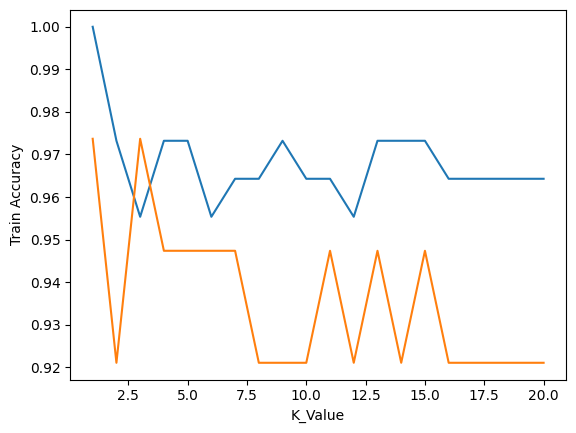

In [66]:
k = []
y_test_acc = []
y_train_acc = []

X , y = load_iris(return_X_y=True, as_frame=True)
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.25 , random_state=22)

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i , p=1 , metric='minkowski')
    knn.fit(X_train , y_train)

    y_predict = knn.predict(X_test)
    y_train_pred = knn.predict(X_train)


    test_acc = accuracy_score(y_test , y_predict)
    train_acc = accuracy_score(y_train , y_train_pred)
    
    k.append(i)
    y_test_acc.append(test_acc)
    y_train_acc.append(train_acc)

df_acc = pd.DataFrame({"K_Value":k , "Train Accuracy":y_train_acc , "Test Accuracy":y_test_acc})
sns.lineplot(data = df_acc , x = 'K_Value' , y = "Train Accuracy")
sns.lineplot(data = df_acc , x = 'K_Value' , y = "Test Accuracy")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    K_value  Train Accuracy  Validation Accuracy
0         1        1.000000             0.945850
1         2        0.973214             0.936759
2         3        0.964286             0.964032
3         4        0.973214             0.954941
4         5        0.973214             0.954941
5         6        0.964286             0.964032
6         7        0.973214             0.982213
7         8        0.964286             0.964032
8         9        0.982143             0.982213
9        10        0.964286             0.973123
10       11        0.982143             0.973123
11       12        0.973214             0.973123
12       13        0.982143             0.973123
13       14        0.973214             0.973123
14       15        0.982143             0.973123
15       16        0.973214             0.954941
16       17        0.982143             0.973123
17       18        0.973214             0.955336
18       19        0.973214             0.973518
19       20        0

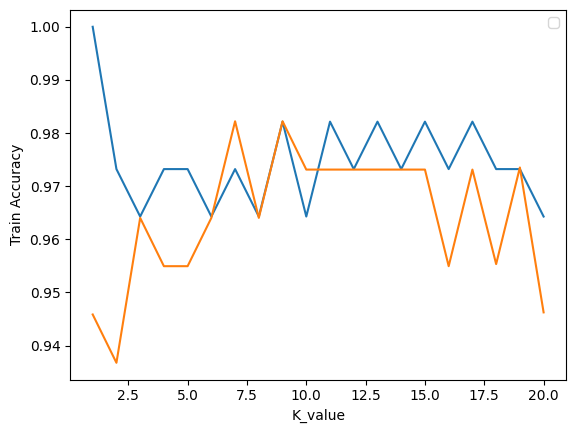

In [78]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = []
train_acc = []
valid_acc = []

X, y = load_iris(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2002)

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i, p=1, metric='minkowski')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    train = accuracy_score(y_train, y_pred)
    
    k_fold = KFold(n_splits=5, shuffle=True, random_state=20)
    cross_val_acc = cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    
    k.append(i)
    train_acc.append(train)
    valid_acc.append(cross_val_acc.mean())
    
df_val_trai_acc = pd.DataFrame({"K_value": k, "Train Accuracy": train_acc, "Validation Accuracy": valid_acc})
print(df_val_trai_acc)

sns.lineplot(data = df_val_trai_acc , x = 'K_value' , y = "Train Accuracy")
sns.lineplot(data = df_val_trai_acc , x = 'K_value' , y = "Validation Accuracy")
plt.legend()
plt.show()

In [83]:
X , y = load_iris(return_X_y=True, as_frame=True)
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.25 , random_state=2002)

knn = KNeighborsClassifier(n_neighbors=3 , p=1 , metric='minkowski')
knn.fit(X_train , y_train)
y_predict = knn.predict(X_test)

test_acc = accuracy_score(y_test , y_predict)
test_acc

0.9210526315789473

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , recall_score , f1_score , classification_report
import missingno
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold , cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\data - data.csv")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
X = df.drop('Target' , axis = 1)
y = df['Target']

In [4]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=22)
print("X_train shape (80% data)  :- " , X_train.shape)
print("X_test shape  (20% data)  :- " ,X_test.shape)

X_train shape (80% data)  :-  (3539, 36)
X_test shape  (20% data)  :-  (885, 36)


In [9]:
knn = KNeighborsClassifier(n_jobs=5 , p=1 , metric='minkowski')
knn.fit(X_train , y_train)
y_predict = knn.predict(X_test)
y_predict

array(['Graduate', 'Graduate', 'Enrolled', 'Graduate', 'Graduate',
       'Dropout', 'Enrolled', 'Dropout', 'Graduate', 'Graduate',
       'Dropout', 'Dropout', 'Graduate', 'Dropout', 'Dropout', 'Graduate',
       'Enrolled', 'Dropout', 'Graduate', 'Enrolled', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Enrolled', 'Graduate',
       'Graduate', 'Enrolled', 'Dropout', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Dropout', 'Graduate', 'Dropout', 'Dropout', 'Dropout', 'Dropout',
       'Graduate', 'Graduate', 'Graduate', 'Dropout', 'Graduate',
       'Graduate', 'Graduate', 'Enrolled', 'Dropout', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Dropout', 'Dropout', 'Graduate', 'Graduate', 'Graduate',
       'Enrolled', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Dropout', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Graduate', 'Dropout', 'Graduate', 'Enrolled', 'Gra

In [7]:
std = StandardScaler()
std.fit(X_train)
X_train = pd.DataFrame(std.transform(X_train) , columns=std.get_feature_names_out())
X_train

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.290869,-1.003721,0.202357,0.138693,0.347341,-0.350379,-0.353708,-0.130451,-1.187164,-1.379054,...,-0.202403,-0.289001,-0.577675,1.247069,-0.809251,0.624431,-0.207298,-1.006190,0.108152,1.525418
1,-0.290869,-0.029315,0.202357,0.138693,0.347341,-0.350379,-1.342788,-0.130451,-1.187164,0.961887,...,1.280631,-0.289001,-0.577675,0.233548,-0.476467,0.464401,-0.207298,-0.818569,-1.488460,-1.375749
2,-0.290869,1.403634,3.243305,0.182974,0.347341,-0.350379,-0.277625,-0.130451,0.929106,0.766808,...,-0.202403,5.430626,3.131811,1.753829,2.851372,0.579623,-0.207298,-0.818569,-1.488460,-1.375749
3,-0.290869,-1.003721,3.243305,0.443305,0.347341,-0.350379,0.034316,-0.130451,-1.187164,-1.379054,...,-0.202403,-0.289001,-0.113989,-2.046874,-1.474818,-1.968053,-0.207298,-1.494007,0.979032,0.129532
4,-0.290869,-0.086633,0.962594,0.310463,0.347341,-0.350379,0.787539,-0.130451,1.185624,-1.379054,...,-0.202403,-0.289001,0.349697,-0.273212,0.521885,0.534814,-0.207298,-1.494007,0.979032,0.129532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,-0.290869,-0.086633,0.202357,0.108524,0.347341,-0.350379,0.034316,-0.130451,-0.032835,1.026913,...,-0.202403,-0.289001,-0.113989,2.767349,-0.809251,0.624431,-0.207298,0.307161,-0.545007,0.772777
3535,-0.290869,-0.086633,3.243305,0.310463,0.347341,-0.350379,0.178874,-0.130451,-0.032835,-0.208583,...,-0.202403,-0.289001,0.813383,-0.019832,1.187453,0.654437,-0.207298,-0.180655,-0.472434,0.873421
3536,1.356147,1.174363,0.202357,0.393185,0.347341,-0.350379,-2.484035,-0.130451,1.121494,0.961887,...,-0.202403,-0.289001,-0.577675,-0.273212,-0.476467,0.400389,-0.207298,-0.818569,-1.488460,-1.375749
3537,-0.290869,1.174363,-0.557879,0.310463,0.347341,1.414734,0.034316,-0.130451,1.185624,0.961887,...,-0.202403,-0.289001,0.813383,0.233548,0.854669,0.613458,-0.207298,0.870026,-1.125594,0.335196


In [8]:
std = StandardScaler()
std.fit(X_test)
X_test = pd.DataFrame(std.transform(X_test) , columns=std.get_feature_names_out())
X_test

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.310911,-1.039002,1.757522,0.317135,0.360927,-0.349653,0.039622,-0.109747,1.166767,-0.233439,...,-0.189026,-0.256036,0.777347,-0.000858,0.834885,0.473275,-0.181452,0.449748,1.834927,-0.732292
1,-0.310911,-0.130557,-0.538847,0.317135,0.360927,-0.349653,-0.110104,-0.109747,-1.200235,-0.233439,...,-0.189026,-0.256036,0.777347,1.517977,0.834885,0.384805,-0.181452,1.503525,1.190774,-1.803090
2,-0.310911,-1.039002,-0.538847,0.148711,0.360927,-0.349653,-0.783872,-0.109747,-1.200235,-0.233439,...,-0.189026,-0.256036,-0.502167,0.252281,0.179565,0.659337,-0.181452,-0.980379,0.188758,1.631632
3,-0.310911,-0.698335,-0.538847,0.119130,0.360927,3.441820,0.563664,-0.109747,-1.200235,-0.233439,...,-0.189026,-0.256036,-0.075662,-0.000858,0.507225,1.190844,-0.181452,0.336843,-0.455396,0.851220
4,-0.310911,-1.039002,-0.538847,0.317135,0.360927,-0.349653,2.210653,-0.109747,-1.072289,-1.220979,...,-0.189026,-0.256036,0.777347,0.252281,1.162545,0.763617,-0.181452,-0.152411,-0.383823,0.955577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,-0.310911,1.118555,-0.538847,0.343854,0.360927,-0.349653,0.047109,-0.109747,1.550605,1.149117,...,-0.189026,-0.256036,0.350842,1.517977,-0.475755,0.237962,-0.181452,-0.152411,-0.383823,0.955577
881,-0.310911,-1.039002,-0.538847,0.447390,0.360927,-0.349653,0.563664,-0.109747,-1.200235,-0.233439,...,-0.189026,-0.256036,-0.075662,-0.507136,0.507225,0.608261,-0.181452,-0.792204,-1.385840,-1.376586
882,-0.310911,-0.130557,0.226610,0.140600,0.360927,-0.349653,-0.409556,-0.109747,-1.072289,-1.418487,...,-0.189026,-0.256036,-0.075662,-2.025971,-1.458735,-1.945528,-0.181452,1.503525,1.190774,-1.803090
883,-0.310911,-1.039002,2.522979,0.317135,0.360927,-0.349653,-0.409556,-0.109747,-0.048721,-0.233439,...,-0.189026,-0.256036,0.777347,-0.000858,0.834885,0.485862,-0.181452,-0.265315,0.188758,0.828533


In [10]:
accuracy_score(y_test , y_predict)

0.711864406779661

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv(r"C:\Users\User\Downloads\student_data.csv")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,2nd phase - general contingent,fifth choice,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),first choice,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,fifth choice,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,second choice,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,first choice,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1st phase - general contingent,sixth choice,Journalism and Communication,daytime,Secondary education,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,single,1st phase - general contingent,second choice,Journalism and Communication,daytime,Secondary education,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,single,1st phase - general contingent,first choice,Nursing,daytime,Secondary education,154.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,single,1st phase - general contingent,first choice,Management,daytime,Secondary education,180.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
wins = Winsorizer(capping_method='mad' , tail='both' , fold=4)
wins.fit(X_train[['Age at enrollment']])
X_train[['Age at enrollment']] = wins.transform(X_train[['Age at enrollment']]).plot(kind='box')

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder , StandardScaler , LabelEncoder , OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [75]:
df = pd.read_csv(r"E:\#Data Science Innomatics\Module 6 Ai-ML\Datasets\Datasets\loandata.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N
1,LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y
2,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
3,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
4,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y


In [76]:
df.drop('Loan_ID' , axis=1 , inplace=True)

In [77]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N
1,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y
2,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
3,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
4,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
610,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
611,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
612,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y


In [78]:
df.shape

(614, 12)

In [79]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [80]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [81]:
df.duplicated().sum()

0

In [82]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [83]:
X = df.drop('Loan_Status' , axis=1)
y = df['Loan_Status']
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size=0.2 , random_state=23)

In [84]:
cat_col = X_train.select_dtypes(include='object').columns
num_col = X_train.select_dtypes(exclude='object').columns

In [85]:
cat_col

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [86]:
cat_trans = Pipeline([('Mode Impute' , SimpleImputer(strategy='most_frequent')),
                      ('Encoding' , OrdinalEncoder())])


num_trans = Pipeline([('Mean Impute' , SimpleImputer(strategy='mean')),
                      ('Scaling' , StandardScaler())])


preprocess = ColumnTransformer([('Categorical' , cat_trans , cat_col) , 
                                ('Numerical' , num_trans , num_col)])

pip = Pipeline([('Preprocessing' , preprocess),
                ('Regress-Model' , KNeighborsClassifier())])

pip

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Categorical',
                                                  Pipeline(steps=[('Mode '
                                                                   'Impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoding',
                                                                   OrdinalEncoder())]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')),
                                                 ('Numerical',
                                                  Pipeline(steps=[('Mean '
                                                                   'Impute',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object'))])),
                ('Regress-Model', KNeighborsClassifier())])

In [87]:
pip.fit(X_train , y_train)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Categorical',
                                                  Pipeline(steps=[('Mode '
                                                                   'Impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoding',
                                                                   OrdinalEncoder())]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')),
                                                 ('Numerical',
                                                  Pipeline(steps=[('Mean '
                                                                   'Impute',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object'))])),
                ('Regress-Model', KNeighborsClassifier())])

In [59]:
pip.fit(X_train , y_train)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Categorical',
                                                  Pipeline(steps=[('Mode '
                                                                   'Impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoding',
                                                                   OrdinalEncoder())]),
                                                  Index(['origin', 'name'], dtype='object')),
                                                 ('Numerical',
                                                  Pipeline(steps=[('Mean '
                                                                   'Impute',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year'],
      dtype='object'))])),
                ('Regress-Model', KNeighborsRegressor())])

In [89]:
y_pred = pip.predict(X_test)

In [90]:
accuracy_score(y_test , y_pred)

0.7723577235772358

In [91]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           N       0.75      0.39      0.52        38
           Y       0.78      0.94      0.85        85

    accuracy                           0.77       123
   macro avg       0.76      0.67      0.68       123
weighted avg       0.77      0.77      0.75       123



In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder  , OrdinalEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , ConfusionMatrixDisplay , classification_report
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as st
from sklearn.feature_selection import f_classif , f_oneway , f_classif , SelectKBest
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer

In [121]:
df = pd.read_csv(r"C:\Users\User\Downloads\Brain-tumor-detection.csv")
df.head()

,Unnamed: 0,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,(8.439724311699382e-17+1.3783115780934465j),1
1,1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,(1.015395044877726e-16+1.6582659515946696j),1
2,2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,(8.176507178841775e-17+1.3353249581078526j),1
3,3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,(6.311037889163952e-17+1.0306707033502136j),1
4,4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,(8.50007943665633e-17+1.3881683180120858j),1


In [122]:
df.drop('Unnamed: 0' , axis=1 , inplace=True)

In [123]:
df.drop_duplicates(inplace=True)

In [124]:
X = df.drop('Class' , axis=1)
y = df['Class']

In [125]:
lab = OrdinalEncoder()
lab.fit(X[['Eccentricity']])
X[['Eccentricity']]= pd.DataFrame(lab.transform(X[['Eccentricity']]), columns=lab.get_feature_names_out())
X

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,168.0
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,2.0
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,162.0
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,134.0
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,170.0
...,...,...,...,...,...,...,...,...
236,545.5,208.267025,1317.5,0.414042,26.354358,28.902472,64.973869,NaN
237,902.0,232.166520,1444.5,0.624438,33.888967,30.549131,62.921772,NaN
238,3177.0,217.681239,3260.0,0.974540,63.600959,63.508198,66.241142,NaN
239,6103.0,1208.631593,51259.5,0.119061,88.150899,280.000031,285.934113,NaN


In [126]:
col = X.select_dtypes(exclude='object').columns

In [127]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [128]:
imp = SimpleImputer(strategy='median')
X[col] = imp.fit_transform(X[col])
X[col]

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,168.0
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,2.0
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,162.0
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,134.0
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,170.0
...,...,...,...,...,...,...,...,...
236,545.5,208.267025,1317.5,0.414042,26.354358,28.902472,64.973869,99.0
237,902.0,232.166520,1444.5,0.624438,33.888967,30.549131,62.921772,99.0
238,3177.0,217.681239,3260.0,0.974540,63.600959,63.508198,66.241142,99.0
239,6103.0,1208.631593,51259.5,0.119061,88.150899,280.000031,285.934113,99.0


In [129]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [130]:
win = Winsorizer(capping_method='mad' , tail='both' , fold=5)
win.fit(X_train[col])
X_train[col] = win.transform(X_train[col])
X_train[col]

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity
55,1852.500000,293.178714,2824.500000,0.655868,48.566205,45.951042,75.614738,10.0
36,733.500000,145.154328,920.000000,0.797283,30.560124,19.838106,56.872528,49.0
138,8484.888835,859.394004,15278.322344,0.993388,212.455712,229.065399,283.598083,147.0
65,307.000000,78.083260,340.000000,0.902941,19.770800,14.138240,30.886417,156.0
204,3265.500000,743.737149,9898.500000,0.329898,64.480724,85.497292,127.483498,99.0
...,...,...,...,...,...,...,...,...
121,6127.000000,365.161468,6983.000000,0.877417,88.324055,81.260620,101.323204,26.0
14,1160.500000,203.580734,1674.000000,0.693250,38.439491,27.039434,69.998665,25.0
103,331.000000,135.195958,798.500000,0.414527,20.529060,53.859791,97.700401,123.0
228,565.500000,190.953318,1225.500000,0.461444,26.833132,43.962639,52.026615,99.0


In [131]:
X_test[col] = win.transform(X_test[col])
X_test[col]

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity
224,7465.000000,1388.348006,15278.322344,0.057314,97.492221,292.091900,415.416387,99.0
229,1006.000000,231.622364,1588.500000,0.633302,35.789370,20.708372,86.956146,99.0
128,1825.000000,822.808217,15278.322344,0.073436,48.204379,222.422867,251.375961,187.0
71,1750.500000,241.865005,2414.500000,0.724995,47.210230,46.476662,74.193375,77.0
115,8484.888835,562.943213,13080.000000,0.835589,117.965553,100.114128,153.550659,27.0
15,2111.000000,388.617314,4407.500000,0.478956,51.844080,65.219048,104.991112,157.0
9,8484.888835,1388.348006,15278.322344,0.515191,128.223797,128.977325,195.831879,148.0
16,6403.500000,1388.348006,15278.322344,0.069732,90.295013,292.091900,415.416387,124.0
170,307.500000,219.036577,1059.000000,0.290368,19.786894,30.169088,67.685226,55.0
145,104.500000,42.727922,109.000000,0.958716,11.534883,9.347109,16.334406,14.0


In [132]:
def sqrt(n):
    return np.sqrt(n)

func = FunctionTransformer(func=sqrt)
func.fit(X_train[col])
X_train[col] = func.transform(X_train[col])
X_train[col]

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity
55,43.040678,17.122462,53.146025,0.809857,6.968946,6.778720,8.695674,3.162278
36,27.083205,12.048001,30.331502,0.892907,5.528121,4.453999,7.541388,7.000000
138,92.113456,29.315423,123.605511,0.996688,14.575861,15.134907,16.840371,12.124356
65,17.521415,8.836473,18.439089,0.950232,4.446437,3.760085,5.557555,12.489996
204,57.144554,27.271545,99.491206,0.574368,8.029989,9.246475,11.290859,9.949874
...,...,...,...,...,...,...,...,...
121,78.275156,19.109199,83.564346,0.936705,9.398088,9.014467,10.065943,5.099020
14,34.066112,14.268172,40.914545,0.832616,6.199959,5.199946,8.366520,5.000000
103,18.193405,11.627380,28.257742,0.643838,4.530901,7.338923,9.884351,11.090537
228,23.780244,13.818586,35.007142,0.679297,5.180071,6.630433,7.212948,9.949874


In [133]:
X_test[col] = func.transform(X_test[col])
X_test[col]

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity
224,86.400231,37.260542,123.605511,0.239404,9.873815,17.090696,20.381766,9.949874
229,31.717503,15.219145,39.855991,0.795803,5.982422,4.550645,9.325028,9.949874
128,42.720019,28.684634,123.605511,0.270991,6.942937,14.913848,15.854840,13.674794
71,41.838977,15.552010,49.137562,0.851466,6.870970,6.817379,8.613558,8.774964
115,92.113456,23.726424,114.367828,0.914105,10.861195,10.005705,12.391556,5.196152
15,45.945620,19.713379,66.389005,0.692067,7.200283,8.075831,10.246517,12.529964
9,92.113456,37.260542,123.605511,0.717768,11.323595,11.356818,13.993994,12.165525
16,80.021872,37.260542,123.605511,0.264069,9.502369,17.090696,20.381766,11.135529
170,17.535678,14.799884,32.542280,0.538858,4.448246,5.492639,8.227103,7.416198
145,10.222524,6.536660,10.440307,0.979140,3.396304,3.057304,4.041585,3.741657


In [134]:
gnb = GaussianNB()
gnb.fit(X_train , y_train)

y_pred = gnb.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

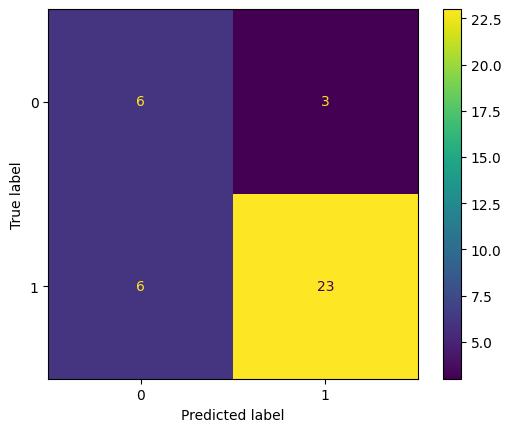

In [135]:
ConfusionMatrixDisplay(confusion_matrix(y_test , y_pred)).plot()

In [136]:
print("Accuracy Score  :- " , accuracy_score(y_test , y_pred))
print("Precision Score :- " , precision_score(y_test , y_pred))
print("Recal Score     :- " , recall_score(y_test , y_pred))
print("F-1 Score       :- " , f1_score(y_test , y_pred))

Accuracy Score  :-  0.7631578947368421
Precision Score :-  0.8846153846153846
Recal Score     :-  0.7931034482758621
F-1 Score       :-  0.8363636363636363


In [119]:
lab = LabelEncoder()
lab.fit(X_train[['Eccentricity']])
X_train[['Eccentricity']] = lab.transform(X_train[['Eccentricity']])
X_train

ValueError: Columns must be same length as key